# Pymaceuticals Inc.
---

### Analysis

1. Ramicane and Capomulin appear to most consistently yield mice with the largest number of timepoints, suggesting a possibility that the drug has a positive effect on longevity. As referenced in the bar graph "Drug Regimen VS. # of Observed Mouse Timepoints," it is clear that these two drugs are outperforming in that their timepoint amount is at least 1.3X of the other drugs. Alternatively, we also see that Propiva is displaying a significant dip in this bar graph, possibily suggesting either a toxic effect compared to the other drugs, or ineffectivity. Additional timepoints also allow for a greater amount of measurements, increased n per subject and possibily greater verifiability. 

2. There is a strong positive correlation between weight and average tumor volume (based on the regression plot), with an r squared value of 0.71. As such, a future trend we may come to expect would be that as the mice gets heavier, the tumor volume increases. 

3. A random representative of the well-performing Capomulin drug on one mouse l509, as represented in a line plot, has demonstrated tumour shrinkage over time, but resurgence of malignancy/growth as time progressed, potentially mirroring metastatisized sites, secondary locations or recurring tumours. Capomulin has demonstrated ability to handle these growths, repeatedly corresponding with shrinkage. Ultimately, despite re-growth at some timepoints, the ultimate tumour volume was lower than initial onset prior to drug usage, suggesting efficacy of the drug. 
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_results = mouse_metadata.rename(columns={'"Mouse ID"':'Mouse ID'}, inplace=True) 
mouse_complete = pd.merge(mouse_metadata, study_results, how= 'left', on=["Mouse ID"])

# Display the data table for preview
mouse_complete.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
# Display # of unique Mice IDs and then calc of the length of that list for # of unique mice tested
print(len(mouse_complete.value_counts(["Mouse ID"])))

249


In [122]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Code from pandas documentation 

# Dropped any rows duplicated across Mouse ID, keep=False b/c we are not keeping any of the duplicated data

munique = mouse_complete.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep=False)

In [139]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# Dropped in previous step; viewing here
munique.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [124]:
# Checking the number of mice in the clean DataFrame.
# Number of unique mice number the same as we didn't drop Mice IDs, just rows of duplicated data [if not identical across Mouse ID and TP, it is kept.]
len(munique.value_counts(["Mouse ID"]))

249

## Summary Statistics

In [140]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.


mean_munique = munique.groupby(["Drug Regimen"])['Tumor Volume (mm3)'].mean()
med_munique = munique.groupby(["Drug Regimen"])['Tumor Volume (mm3)'].median()
var_munique = munique.groupby(["Drug Regimen"])['Tumor Volume (mm3)'].var()
std_munique = munique.groupby(["Drug Regimen"])['Tumor Volume (mm3)'].std()
sem_munique = munique.groupby(["Drug Regimen"])['Tumor Volume (mm3)'].sem()

summ_munique = pd.concat([mean_munique, med_munique, var_munique, std_munique, sem_munique],axis=1,sort=False)
summ_munique.columns = ["Mean Tumor Volume", "Median Tumor Volume", "Tumor Volume Variance", "Tumor Volume Std.Dev.", "Tumor Volume Std. Err."]
summ_munique

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std.Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.458254,50.854632,44.053659,6.637293,0.540135
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [141]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_num = munique.groupby(["Drug Regimen"])["Timepoint"].count().reset_index(name = '# Timepoints')
drug_num

,Drug Regimen,# Timepoints
0,Capomulin,230
1,Ceftamin,178
2,Infubinol,178
3,Ketapril,188
4,Naftisol,186
5,Placebo,181
6,Propriva,151
7,Ramicane,228
8,Stelasyn,181
9,Zoniferol,182


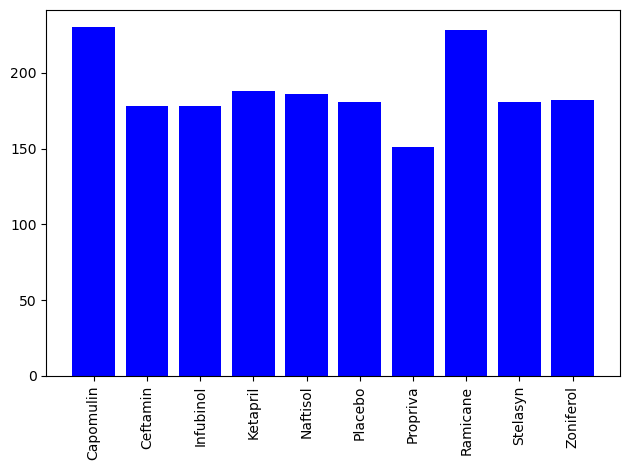

In [142]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = np.arange(len(drug_num))
tick_locations = [value for value in x_axis]

plt.ylabel = ("# of Observed Mouse Timepoints")
plt.xlabel = ("Drug Regimen")
plt.title = ("Mice Tested vs. Drug Tested")

plt.bar(x_axis, drug_num["# Timepoints"], color='b', align='center')
plt.xticks(tick_locations, drug_num["Drug Regimen"], rotation="vertical")
plt.tight_layout()

plt.show()

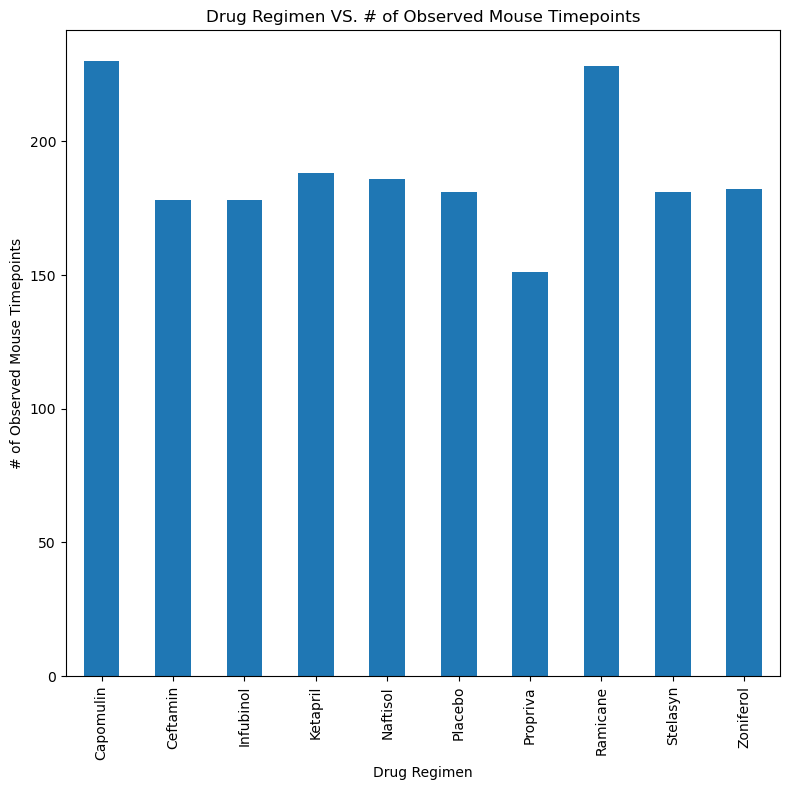

In [143]:
drug_num.plot(kind="bar", x="Drug Regimen", y="# Timepoints", figsize=(8,8), title="Drug Regimen VS. # of Observed Mouse Timepoints", ylabel= "# of Observed Mouse Timepoints", legend=None)
plt.tight_layout()
plt.show()

In [144]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
drug_sex = munique.groupby(["Sex"])["Sex"].value_counts()
drug_sex

Sex
Female    925
Male      958
Name: count, dtype: int64

In [145]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sexes = ["Female", "Male"] 
sexcount = [930, 958]
colors = ["blue","orange"]
explode =(0,0)

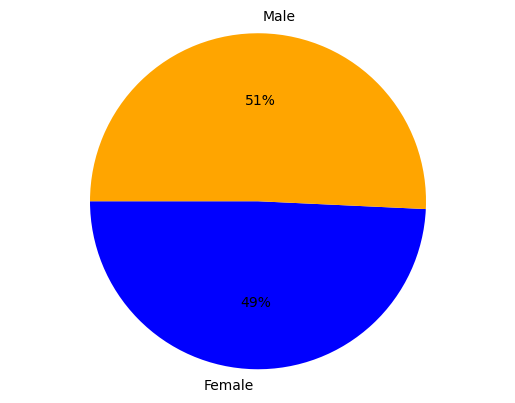

In [146]:
plt.pie(sexcount, explode = explode, labels = sexes, colors = colors, autopct="%1.0f%%", shadow=False, startangle=180)
plt.axis("equal")
plt.show()

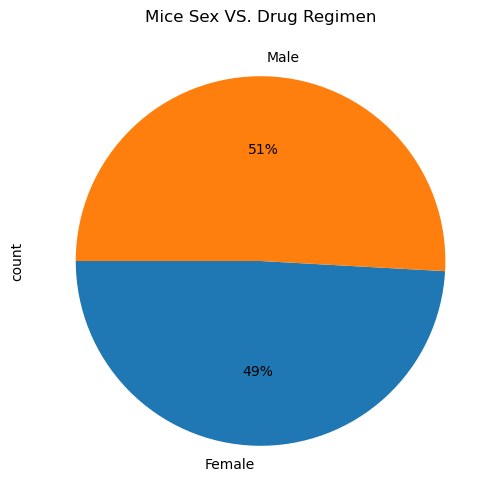

In [147]:
drug_sex.plot(kind="pie", x=sexes, y="Mouse Total", autopct='%1.0f%%', startangle=180, figsize=(6,6), title="Mice Sex VS. Drug Regimen")
plt.show()

## Quartiles, Outliers and Boxplots

In [148]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
#munique_clean = munique.drop_duplicates(subset=["Mouse ID"], keep="last") [considered this code; can't guarantee last = latest so dropped]

# Start by getting the last (greatest) timepoint for each mouse

fintumvol = munique.groupby(["Mouse ID"])['Timepoint'].max()
fintumvol = fintumvol.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
munique_combo = pd.merge(fintumvol, study_results, how="left", on=["Mouse ID", "Timepoint"])
munique_combo.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,45,67.973419,2
1,a251,45,65.525743,1
2,a262,45,70.717621,4
3,a275,45,62.999356,3
4,a366,30,63.440686,1


In [149]:
drug_vol = munique.loc[munique['Drug Regimen'].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
drug_vol.head()
#drop rows w/ other drugs as only interested across the 4 drugs 

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


<function matplotlib.pyplot.show(close=None, block=None)>

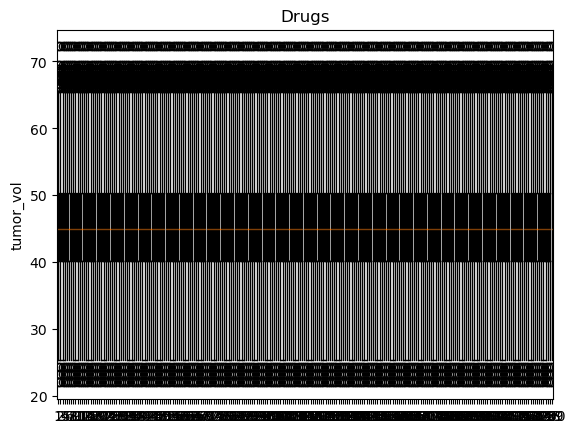

In [150]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]


# Create empty list to fill with tumor vol data (for plotting)
#tumor_vol = munique["Tumor Volume (mm3)"]

for treatment in treatments: 
    tumordrugdata = drug_vol.loc[drug_vol["Drug Regimen"]== treatment, "Tumor Volume (mm3)"]

#dict = {"Capomulin": cap, "Ramicane": ram, "Infubinol": inf, "Cetamin": cef}
#drugvolsum = pd.DataFrame(dict)

fig1, ax1 = plt.subplots()
ax1.set_title('Drugs')
ax1.set_ylabel('tumor_vol')
ax1.boxplot(cap)
plt.show


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


In [18]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


## Line and Scatter Plots

<function matplotlib.pyplot.show(close=None, block=None)>

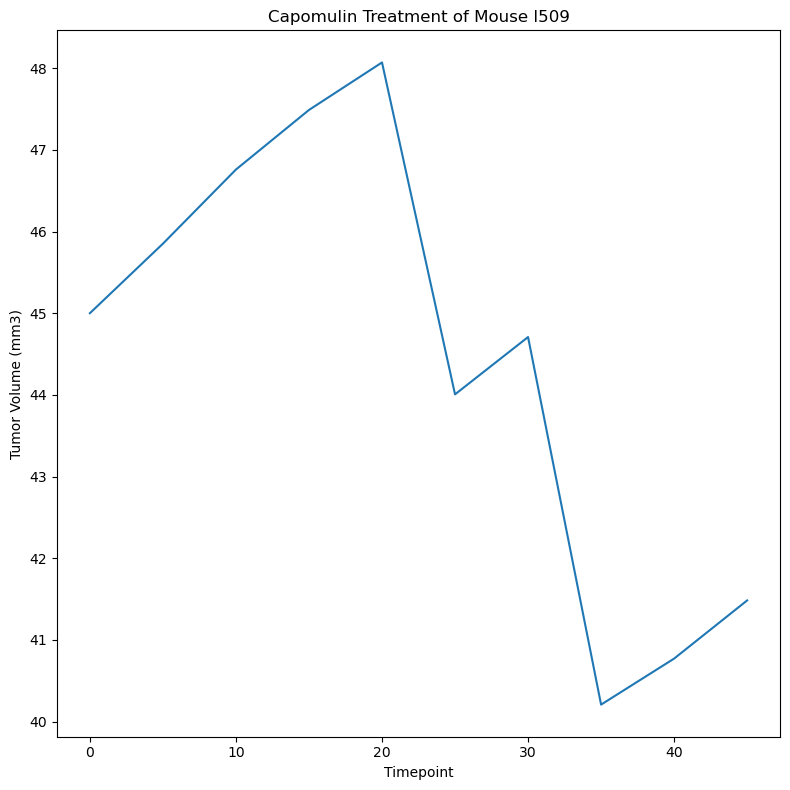

In [151]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

indivm = munique[munique["Mouse ID"] == "l509"]

indivm.plot(kind="line", x="Timepoint", y="Tumor Volume (mm3)", figsize=(8,8), title="Capomulin Treatment of Mouse l509", ylabel= "Tumor Volume (mm3)", legend=None)
plt.tight_layout()
plt.show

In [152]:
# Selecting only for Capomulin treated subjects/conditions

capo = drug_vol[drug_vol["Drug Regimen"] == "Capomulin"]
capo

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [153]:
#Group by unique mice IDs and their corresponding weights, and averaging their tumor volume across study span/timepoints

capo_tum_wei = capo.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean()

#Reset index to more cleanly retrieve data in future

capo_clean = capo_tum_wei.reset_index()
capo_clean

,Mouse ID,Weight (g),Tumor Volume (mm3)
0,b128,22,41.963636
1,b742,21,40.083699
2,f966,17,36.505973
3,g288,19,41.990097
4,g316,22,44.613344
5,i557,24,44.805810
6,i738,20,39.141053
7,j119,23,44.465236
8,j246,21,43.216925
9,l509,21,44.434474


<function matplotlib.pyplot.show(close=None, block=None)>

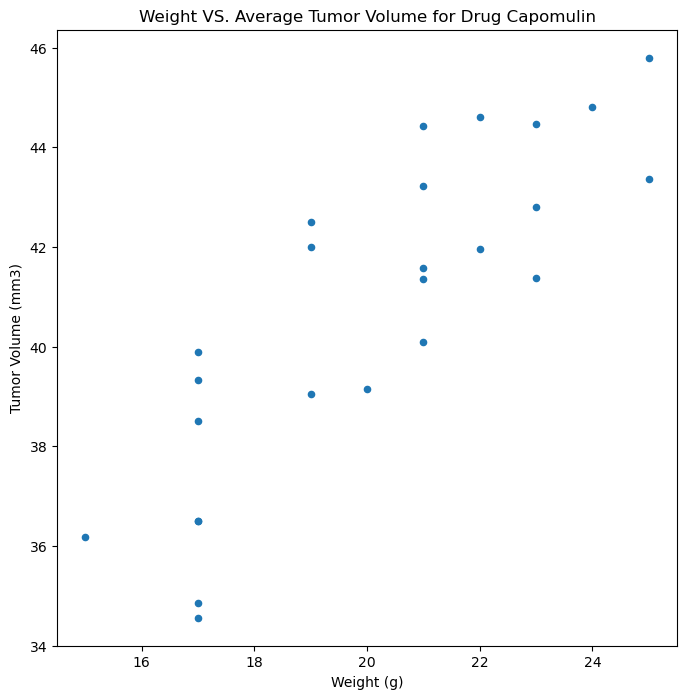

In [154]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

capo_clean.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)", figsize=(8,8), title="Weight VS. Average Tumor Volume for Drug Capomulin")
plt.show

## Correlation and Regression

The r-squared is: 0.7088568047708723
The correlation between mouse weight and the average tumor volume is: 0.8419363424694721


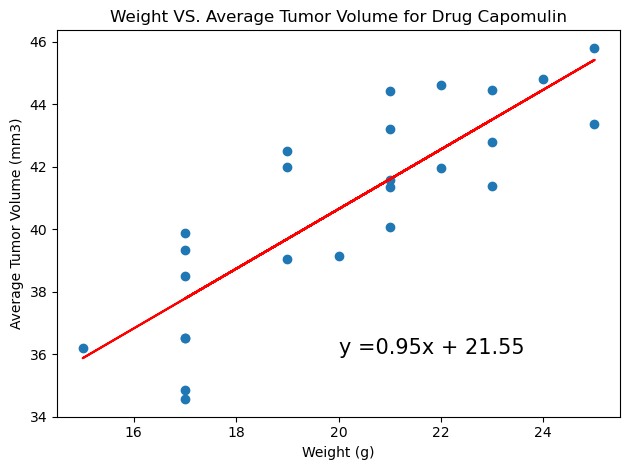

In [26]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

x_values = capo_clean["Weight (g)"]
y_values = capo_clean["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(20,36), fontsize=15,color="black")
plt.scatter(x_values, y_values)
plt.xlabel("Weight (g)")
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Weight VS. Average Tumor Volume for Drug Capomulin')
print(f"The r-squared is: {rvalue**2}")
print(f"The correlation between mouse weight and the average tumor volume is: {rvalue}")
plt.tight_layout()
plt.show()

